In [14]:
from keithley2600 import Keithley2600
from pmu_som import communicator, pmu_ctrl, pmu_cal
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

try:
    del(p.c)
except:
    pass

k = Keithley2600('GPIB0::17::INSTR', visa_library='')
k.smua.reset()
k.smub.reset()

# p = communicator.communicator(False)
p = pmu_ctrl.pmu()


k.smua.measure.autorangev = k.smua.AUTORANGE_ON
k.smua.measure.autorangei = k.smua.AUTORANGE_ON
k.smua.measure.nplc = 10 # 0.001 to 25

k.smua.source.highc = k.smua.ENABLE
k.smua.source.func = k.smua.OUTPUT_DCAMPS
k.smua.source.leveli = 0
k.smua.source.output = k.smua.OUTPUT_ON

k.beeper.enable = k.beeper.ON
k.play_chord(notes=("G6", "F6", "C6", "C6"), durations=0.1)
k.beeper.enable = k.beeper.OFF

In [15]:
p.decode_pmu_reg()


,CH EN,FORCE,C,MEAS,FIN,SF0,SS0,CL,CPOLH,COMPARE V/I,LTMPALMn,TMPALMn
0,0,0,3,3,0,0,0,0,0,0,1,1
1,0,0,3,3,0,0,0,0,0,0,1,1
2,0,0,3,3,0,0,0,0,0,0,1,1
3,0,0,3,3,0,0,0,0,0,0,1,1


In [13]:
hex(p.channels[0].pmu_reg)

'0x1e060'

In [16]:
p.decode_sys_ctrl()

{'CL': 0,
 'CPOLH': 0,
 'CPBIASEN': 0,
 'DUTGND/CH': 0,
 'GUARD ALM': 0,
 'CLAMP ALM': 0,
 'INT10K': 0,
 'GUARD EN': 0,
 'GAIN': 0,
 'TMP ENABLE': 1,
 'TMP': 0,
 'LATCHED': 0}

In [ ]:
p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1
})

p.channels[0].change_pmu_reg({
    "SF0"   : 1,
    "SS0"   : 1,
    "FIN"   : 1,
    "CH EN" : 1
})
sleep(0.5)
k.smua.measure.iv()

In [10]:
v=0

In [2]:
p.channels[0].change_pmu_reg({
    "CH EN" : 1, # enable the channel
    "FORCE" : 0, # force voltage clamp current
    "C"     : 3, # 2mA Current range
    "FIN"   : 1, # connect force amp to DAC output
    "MEAS"  : 3, # MEASOUT = High Z
    "CL"    : 1, # Enable Clamp
})

In [3]:
p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "GAIN"      : 0b10,
    "TMP ENABLE": 1,
    "TMP"       : 0b11
})

In [4]:
p.decode_pmu_reg()

,CH EN,FORCE,C,MEAS,FIN,SF0,SS0,CL,CPOLH,COMPARE V/I,LTMPALMn,TMPALMn
0,1,0,3,3,1,0,0,1,2,0,1,1
1,0,0,3,3,0,0,0,0,0,0,1,1
2,0,0,3,3,0,0,0,0,0,0,1,1
3,0,0,3,3,0,0,0,0,0,0,1,1


In [5]:
p.decode_sys_ctrl()

{'CL': 1,
 'CPOLH': 0,
 'CPBIASEN': 0,
 'DUTGND/CH': 1,
 'GUARD ALM': 0,
 'CLAMP ALM': 0,
 'INT10K': 1,
 'GUARD EN': 1,
 'GAIN': 2,
 'TMP ENABLE': 1,
 'TMP': 3,
 'LATCHED': 0}

In [6]:
p.read_dac_regs(reg="X1")



,Offset,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
1,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
2,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
3,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535


In [7]:
p.read_dac_regs(reg="C")

,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
1,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
2,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
3,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768


In [8]:
p.read_dac_regs(reg="M")

,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
1,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
2,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
3,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535


In [2]:
k.beeper.enable = k.beeper.ON
k.play_chord(notes=("C6", "E6", "G6", "C6"), durations=0.21)


In [3]:
p.channels[0].write_dac(
    data=0x0000,
    dac_reg="FIN_U",
    reg="X1"
)
k.smua.source.output = k.smua.OUTPUT_ON   # turn on SMUA
k.smua.source.levelv = 0  # sets SMUA source level to 40V
v = k.smua.measure.v()  # measures and returns the SMUA voltage

# i = k.smua.measure.i()  # measures current at smuA




In [15]:
k.smua.measure.output = k.smua.OUTPUT_OFF
# Calculate step size
step_size = 0xFFFF // 9

# Iterate over the loop to write the data
for i in range(10):
    data = i * step_size
    p.channels[0].write_dac(data=data, dac_reg="FIN_U", reg="X1")
    k.smua.measure.v

k.smua.measure.output = k.smua.OUTPUT_OFF


In [17]:

# p.decode_pmu_reg()
# hex(p.channels[0].pmu_reg)

'0x21fc60'

In [3]:
p.decode_sys_ctrl()

{'CL': 0,
 'CPOLH': 0,
 'CPBIASEN': 0,
 'DUTGND/CH': 0,
 'GUARD ALM': 0,
 'CLAMP ALM': 0,
 'INT10K': 0,
 'GUARD EN': 0,
 'GAIN': 0,
 'TMP ENABLE': 1,
 'TMP': 0,
 'LATCHED': 0}

In [3]:
p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1
})

p.channels[0].change_pmu_reg({
    "SF0"   : 1,
    "SS0"   : 1,
    "FIN"   : 1,
    "CH EN" : 1
})
sleep(0.5)
k.smua.measure.iv()

(-4.92334e-12, 0.00394871)

In [4]:
print("X1")
X1 = p.read_dac_regs(reg="X1")
X1

X1


,Offset,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
1,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
2,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535
3,42130,32768,32768,32768,32768,32768,32768,0,0,65535,65535


In [5]:
print("C")
C = p.read_dac_regs(reg="C")
C

C


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
1,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
2,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768
3,32768,32768,32768,32768,32768,32768,32768,32768,32768,32768


In [6]:
print("M")
M = p.read_dac_regs(reg="M")
M

M


,FIN_I_5u,FIN_I_20u,FIN_I_200u,FIN_I_2m,FIN_I_ext,FIN_U,CLL_I,CLL_U,CLH_I,CLH_U
0,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
1,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
2,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535
3,65535,65535,65535,65535,65535,65535,65535,65535,65535,65535


In [8]:
X2 = ((M+1)/(2**16)*X1) + (C - (2**15))
X2

,CLH_I,CLH_U,CLL_I,CLL_U,FIN_I_200u,FIN_I_20u,FIN_I_2m,FIN_I_5u,FIN_I_ext,FIN_U,Offset
0,65535.0,65535.0,0.0,0.0,32768.0,32768.0,32768.0,32768.0,32768.0,32768.0,NaN
1,65535.0,65535.0,0.0,0.0,32768.0,32768.0,32768.0,32768.0,32768.0,32768.0,NaN
2,65535.0,65535.0,0.0,0.0,32768.0,32768.0,32768.0,32768.0,32768.0,32768.0,NaN
3,65535.0,65535.0,0.0,0.0,32768.0,32768.0,32768.0,32768.0,32768.0,32768.0,NaN


In [9]:
VREF = 5.
DUTGND = 0

X2_FIN_U = ((M["FIN_U"]+1)/(2**16) * X1["FIN_U"]) + (C["FIN_U"] - (2**15))
# X2_FIN_U

VOUT_FIN_U = 4.5 * VREF * (X2["FIN_U"]/(2**16)) - (3.5 * VREF * (X1["Offset"]/(2**16))) + DUTGND
print(VOUT_FIN_U)



0    0.000076
1    0.000076
2    0.000076
3    0.000076
dtype: float64


In [11]:
# X1["Offset"]
X1.loc[0, "Offset"]

42130

In [68]:
p.c.verbose = True

k.smua.measure.filter.enable = k.smua.FILTER_OFF
k.smua.measure.filter.type = k.smua.FILTER_MEDIAN
k.smua.measure.filter.count = 100

p.channels[0].write_dac(
    data=0x8300,
    dac_reg="FIN_U",
    reg="C"
)



p.channels[0].write_dac(
    data=0x8000,
    dac_reg="FIN_U",
    reg="X1"
)

sleep(1)
print(k.smua.measure.v())
    

-0.0892744


In [40]:
k.smua.measure.v()

-0.44609

In [53]:
#measure curve
measure_data = list()
measure_points = np.arange(0, 0xFFFF, 0x0100)
output_voltage = list()

for d in tqdm(measure_points):
    p.channels[0].write_dac(
        data= d,
        dac_reg="FIN_U",
        reg="X1"
    )
    output_voltage.append((4.5 * 5 * d / (2**16)) - 11.25)
    sleep(0.1)
    measure_data.append(k.smua.measure.v())


100%|██████████| 256/256 [01:22<00:00,  3.11it/s]


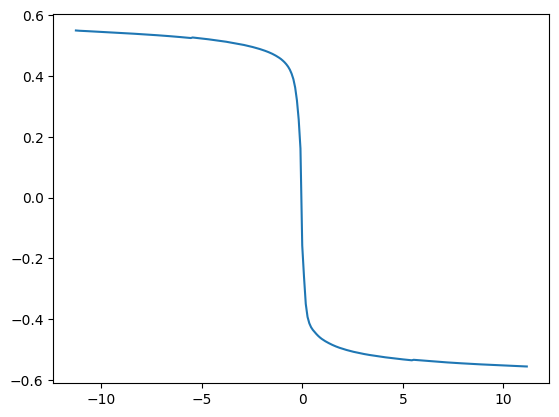

In [56]:
# plt.plot(output_voltage, measure_data)
plt.plot(output_voltage, (np.array(output_voltage) - np.array(measure_data)))
# output_voltage

In [2]:
pmu_cal.calibrate(p, k)

FIN ZERO CALIBRATION for channel 0
Setup Channel for Cal


KeyError: 'Offset'

# Amp Mode

In [6]:
### AMP - MODE

p.write_all_PMU_REGS(0x1E060)

# k.smua.source.func = k.smua.OUTPUT_DCAMPS
k.smua.source.func = k.smua.OUTPUT_DCVOLTS
k.smua.source.levelv = 0
k.smua.source.limiti = 100e-3
k.smua.source.limitv = 13
# k.smua.source.output = k.smua.OUTPUT_OFF
k.smua.source.output = k.smua.OUTPUT_ON


p.channels[0].change_pmu_reg({
    "CH EN": 1,     #Channel enable
    "FORCE": 1,     #FI
    "SS0"  : 1,
    "SF0"  : 1,
    # "C"    : 0,     #5uA Range
    # "C"    : 1,     #20uA Range
    # "C"    : 2,     #200uA Range
    # "C"    : 3,     #2mA Range
    "C"    : 4,     #80mA Range
    "FIN"  : 1
})

p.change_sys_ctrl({
    "DUTGND/CH" : 1,
    "INT10K"    : 1,
    "TMP ENABLE": 1,
    "TMP"       : 3 # Thermal shutdown at 100°C
})

In [11]:
p.channels[0].write_dac(
    data= 0x0000,
    dac_reg="FIN_I_5u",
    reg="X1"
)

100%|██████████| 128/128 [00:41<00:00,  3.05it/s]


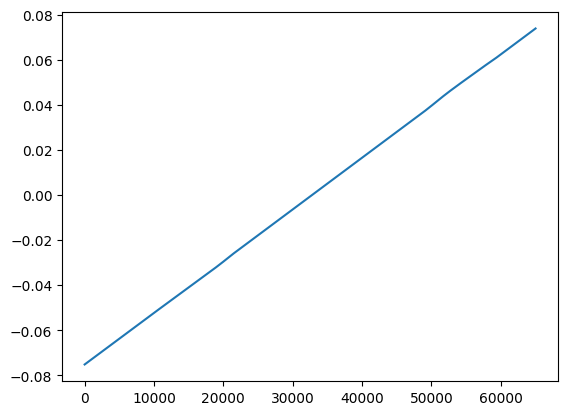

In [7]:
#measure curve
measure_data = list()
measure_points = np.arange(0, 0xFFFF, 0x0200)
# output_voltage = list()

for d in tqdm(measure_points):
    p.channels[0].write_dac(
        data= d,
        # dac_reg="FIN_I_5u",
        # dac_reg="FIN_I_20u",
        # dac_reg="FIN_I_200u",
        # dac_reg="FIN_I_2m",
        dac_reg="FIN_I_ext",
        reg="X1"
    )
    # output_voltage.append((4.5 * 5 * d / (2**16)) - 11.25)
    sleep(0.1)
    measure_data.append(-(k.smua.measure.i()))
    
plt.plot(measure_points, measure_data)

p.write_all_PMU_REGS(0x1E060)

In [20]:
print(measure_points[80])
print(measure_data[80])

print((4.5 * 5 * (measure_points[80]-(2**15))) / ((2**16)*15*10))
print((4.5 * 5 / (2**16)) / (15*10))

40960
0.0187431
0.01875
2.288818359375e-06


In [16]:
measure_points[80]

40960